In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import QuantileTransformer, OneHotEncoder, Normalizer
from sklearn import set_config
set_config(display='diagram')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from joblib import load, dump

In [21]:
df = pd.read_csv('/Users/gabriele/Downloads/Dataset attribuzioni Bialetti - Overall.csv')
df.head()

,Giorno,Transazioni,Spesa Facebook,Spesa Google,Organico
0,01/07/18,0,0.0,0.0,32.0
1,02/07/18,0,0.0,0.0,41.0
2,03/07/18,0,0.0,0.0,28.0
3,04/07/18,0,0.0,0.0,21.0
4,05/07/18,0,0.0,0.0,32.0


In [22]:
df['Giorno'] = pd.to_datetime(df['Giorno'],dayfirst=True, yearfirst=False)
df.head()

,Giorno,Transazioni,Spesa Facebook,Spesa Google,Organico
0,2018-07-01,0,0.0,0.0,32.0
1,2018-07-02,0,0.0,0.0,41.0
2,2018-07-03,0,0.0,0.0,28.0
3,2018-07-04,0,0.0,0.0,21.0
4,2018-07-05,0,0.0,0.0,32.0


In [25]:
s = df['Giorno'].dt.weekday
df['day_week'] =s
df['month'] = pd.DatetimeIndex(df['Giorno']).month
df.head()
df.columns

Index(['Giorno', 'Transazioni', 'Spesa Facebook', 'Spesa Google ', 'Organico',
       'day_week', 'month'],
      dtype='object')

In [29]:
df=df.rename(columns={'Spesa Google ':'google'})
df.sample(10)

,Giorno,Transazioni,Spesa Facebook,google,Organico,day_week,month
968,2021-02-23,45,372.99,0.00,283.0,1,2
508,2019-11-21,0,0.00,0.00,60.0,3,11
236,2019-02-22,0,0.00,0.00,41.0,4,2
1139,2021-08-13,28,270.59,68.36,170.0,4,8
881,2020-11-28,23,29.00,0.00,202.0,5,11
951,2021-02-06,21,137.82,0.00,240.0,5,2
335,2019-06-01,0,0.00,0.00,70.0,5,6
264,2019-03-22,0,0.00,0.00,62.0,4,3
643,2020-04-04,0,5.66,0.00,69.0,5,4
442,2019-09-16,0,0.00,0.00,92.0,0,9


In [30]:
categorical= [
  'day_week', 'month'
]

numerical=[
    'Spesa Facebook','google','Organico'
]

all_features = categorical + numerical

transformers =[
  ('one hot', OneHotEncoder(handle_unknown='ignore'),categorical),
  ('scaler', QuantileTransformer(), numerical),
  ('normalizer',Normalizer(), all_features)
]


ct = ColumnTransformer(transformers)


steps =[
 ('column_transformer',ct),
 ('model', MLPRegressor())
]

pipeline= Pipeline(steps)

pipeline
    

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('one hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day_week', 'month']),
                                                 ('scaler',
                                                  QuantileTransformer(),
                                                  ['Spesa Facebook', 'google',
                                                   'Organico']),
                                                 ('normalizer', Normalizer(),
                                                  ['day_week', 'month',
                                                   'Spesa Facebook', 'google',
                                                   'Organico'])])),
                ('model', MLPRegressor())])

In [31]:
param_space={
    'column_transformer__scaler__n_quantiles':[10,100],
    'column_transformer__normalizer':[ Normalizer(), 'passthrough' ],
    'model__hidden_layer_sizes':[(20,20),(50,50)],
    'model__alpha':[0.01, 0.001]
}

grid = GridSearchCV(pipeline, param_grid=param_space, cv=3, verbose=2)
grid

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['day_week',
                                                                          'month']),
                                                                        ('scaler',
                                                                         QuantileTransformer(),
                                                                         ['Spesa '
                                                                          'Facebook',
                                                                          'google',
                                                                          'Organico']),
                                                                        ('normalizer',
                                                                         Normalizer(),
                                                                         ['day_week',
                                                                          'month',
                                                                          'Spesa '
                                                                          'Facebook',
                                                                          'google',
                                                                          'Organico'])])),
                                       ('model', MLPRegressor())]),
             param_grid={'column_transformer__normalizer': [Normalizer(),
                                                            'passthrough'],
                         'column_transformer__scaler__n_quantiles': [10, 100],
                         'model__alpha': [0.01, 0.001],
                         'model__hidden_layer_sizes': [(20, 20), (50, 50)]},
             verbose=2)

In [32]:
X = df[all_features]
y= df['Transazioni']

In [33]:
X_train, X_test,y_train, y_test = train_test_split(X,y )

In [34]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   0.5s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   0.4s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   0.5s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=   0.7s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=   0.7s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=   0.6s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   0.4s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   0.4s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   0.4s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=   0.7s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=   0.7s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=   0.6s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   0.5s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   0.4s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   0.5s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=   0.7s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=   0.8s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=   0.8s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   0.4s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   0.4s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   0.6s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=   0.7s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=   0.7s
[CV] column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=Normalizer(), column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=   0.7s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   0.5s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   0.5s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   0.6s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=   0.8s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=   0.9s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=   0.9s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   0.6s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   0.6s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   0.7s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 
[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=   0.8s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=   1.0s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=10, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=   0.9s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   0.5s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   0.4s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(20, 20), total=   0.5s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=   0.6s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=   0.8s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50) 
[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.01, model__hidden_layer_sizes=(50, 50), total=   0.8s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   0.6s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   0.6s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(20, 20), total=   0.6s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=   0.9s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=   0.8s
[CV] column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50) 


/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   30.2s finished


[CV]  column_transformer__normalizer=passthrough, column_transformer__scaler__n_quantiles=100, model__alpha=0.001, model__hidden_layer_sizes=(50, 50), total=   0.6s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('column_transformer',
                                        ColumnTransformer(transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['day_week',
                                                                          'month']),
                                                                        ('scaler',
                                                                         QuantileTransformer(),
                                                                         ['Spesa '
                                                                          'Facebook',
                                                                          'google',
                                                                          'Organico']),
                                                                        ('normalizer',
                                                                         Normalizer(),
                                                                         ['day_week',
                                                                          'month',
                                                                          'Spesa '
                                                                          'Facebook',
                                                                          'google',
                                                                          'Organico'])])),
                                       ('model', MLPRegressor())]),
             param_grid={'column_transformer__normalizer': [Normalizer(),
                                                            'passthrough'],
                         'column_transformer__scaler__n_quantiles': [10, 100],
                         'model__alpha': [0.01, 0.001],
                         'model__hidden_layer_sizes': [(20, 20), (50, 50)]},
             verbose=2)

In [35]:
grid.best_params_

{'column_transformer__normalizer': 'passthrough',
 'column_transformer__scaler__n_quantiles': 100,
 'model__alpha': 0.01,
 'model__hidden_layer_sizes': (50, 50)}

In [36]:
grid.best_estimator_

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('one hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['day_week', 'month']),
                                                 ('scaler',
                                                  QuantileTransformer(n_quantiles=100),
                                                  ['Spesa Facebook', 'google',
                                                   'Organico']),
                                                 ('normalizer', 'passthrough',
                                                  ['day_week', 'month',
                                                   'Spesa Facebook', 'google',
                                                   'Organico'])])),
                ('model',
                 MLPRegressor(alpha=0.01, hidden_layer_sizes=(50, 50)))])

In [37]:
dump(grid.best_estimator_, 'Rete_Neurale_Bialetti.joblib')

['Rete_Neurale_Bialetti.joblib']

In [38]:
pipe = load('Rete_Neurale_Bialetti.joblib')
     
pipe.score(X_test, y_test)

0.8810193341794936

In [39]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_column_transformer__normalizer,param_column_transformer__scaler__n_quantiles,param_model__alpha,param_model__hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.437719,0.012877,0.004828,0.000313,Normalizer(),10,0.01,"(20, 20)",{'column_transformer__normalizer': Normalizer(...,0.803947,0.869085,0.844354,0.839128,0.026848,13
1,0.668085,0.042302,0.004481,0.000245,Normalizer(),10,0.01,"(50, 50)",{'column_transformer__normalizer': Normalizer(...,0.833354,0.878077,0.875167,0.862199,0.020431,12
2,0.394240,0.023952,0.004231,0.000088,Normalizer(),10,0.001,"(20, 20)",{'column_transformer__normalizer': Normalizer(...,0.781566,0.860367,0.801865,0.814599,0.033407,16
3,0.690505,0.036265,0.004766,0.000264,Normalizer(),10,0.001,"(50, 50)",{'column_transformer__normalizer': Normalizer(...,0.840596,0.879662,0.875105,0.865121,0.017441,11
4,0.459878,0.048533,0.004391,0.000147,Normalizer(),100,0.01,"(20, 20)",{'column_transformer__normalizer': Normalizer(...,0.792464,0.848400,0.849631,0.830165,0.026663,15
5,0.748819,0.065782,0.007913,0.004081,Normalizer(),100,0.01,"(50, 50)",{'column_transformer__normalizer': Normalizer(...,0.849375,0.885522,0.869329,0.868075,0.014784,10
6,0.461803,0.083309,0.004345,0.000161,Normalizer(),100,0.001,"(20, 20)",{'column_transformer__normalizer': Normalizer(...,0.780717,0.881197,0.830068,0.830661,0.041023,14
7,0.703966,0.035980,0.004669,0.000311,Normalizer(),100,0.001,"(50, 50)",{'column_transformer__normalizer': Normalizer(...,0.851135,0.887362,0.878319,0.872272,0.015395,9
8,0.529280,0.076894,0.003788,0.000491,passthrough,10,0.01,"(20, 20)",{'column_transformer__normalizer': 'passthroug...,0.868782,0.901152,0.875743,0.881892,0.013912,6
9,0.885823,0.054093,0.005176,0.001420,passthrough,10,0.01,"(50, 50)",{'column_transformer__normalizer': 'passthroug...,0.876529,0.901270,0.894579,0.890793,0.010449,2


In [41]:
prediction = pipe.predict(df)

/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [42]:
df['prediction']= prediction
df.sample(10)

,Giorno,Transazioni,Spesa Facebook,google,Organico,day_week,month,prediction
566,2020-01-18,2,10.18,0.0,77.0,5,1,0.496949
805,2020-09-13,13,0.00,0.0,261.0,6,9,12.833042
767,2020-08-06,19,0.00,0.0,266.0,3,8,14.106570
899,2020-12-16,35,89.56,0.0,257.0,2,12,34.678474
941,2021-01-27,40,188.27,0.0,259.0,2,1,34.887618
370,2019-07-06,0,9.24,0.0,95.0,5,7,0.905597
685,2020-05-16,8,41.03,0.0,185.0,5,5,11.679568
813,2020-09-21,17,2.81,0.0,219.0,0,9,11.962772
400,2019-08-05,0,0.00,0.0,123.0,0,8,2.642643
523,2019-12-06,0,3.04,0.0,93.0,4,12,1.761034


In [51]:
df['error'] = df['Transazioni']-df['prediction']
df.tail(10)

,Giorno,Transazioni,Spesa Facebook,google,Organico,day_week,month,prediction,error
1174,2021-09-17,24,173.00,50.14,135.0,4,9,24.558802,-0.558802
1175,2021-09-18,23,124.01,46.62,153.0,5,9,20.606560,2.393440
1176,2021-09-19,18,117.29,41.62,182.0,6,9,24.861915,-6.861915
1177,2021-09-20,23,106.34,44.57,219.0,0,9,33.399050,-10.399050
1178,2021-09-21,26,117.14,43.08,167.0,1,9,26.893021,-0.893021
1179,2021-09-22,19,119.25,29.77,155.0,2,9,24.535212,-5.535212
1180,2021-09-23,28,119.02,47.25,152.0,3,9,23.405225,4.594775
1181,2021-09-24,21,142.29,41.87,160.0,4,9,24.638409,-3.638409
1182,2021-09-25,20,171.69,42.00,120.0,5,9,19.553169,0.446831
1183,2021-09-26,13,167.26,41.17,154.0,6,9,22.358349,-9.358349


<AxesSubplot:xlabel='error', ylabel='Transazioni'>

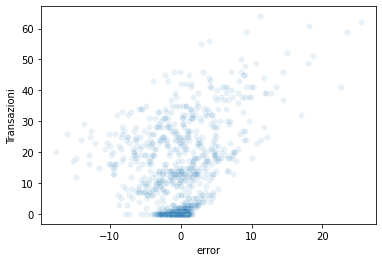

In [49]:
sns.scatterplot(data = df, x='error', y='Transazioni', alpha = 0.1)

/Users/gabriele/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='error', ylabel='Density'>

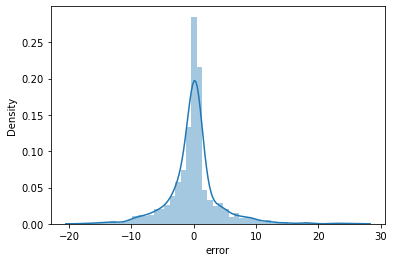

In [50]:
sns.distplot(df['error'])

<AxesSubplot:xlabel='Giorno', ylabel='Transazioni'>

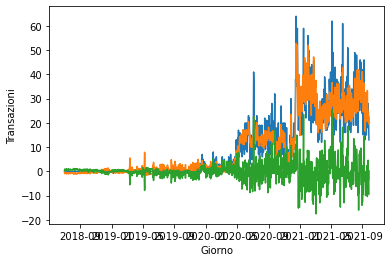

In [54]:
sns.lineplot(data= df, x='Giorno', y= 'Transazioni')
sns.lineplot(data= df, x='Giorno', y= 'prediction')

In [56]:
rt=df[['Giorno','Transazioni', 'Spesa Facebook', 'google', 'Organico','day_week', 'month']]
rt.head()

,Giorno,Transazioni,Spesa Facebook,google,Organico,day_week,month
0,2018-07-01,0,0.0,0.0,32.0,6,7
1,2018-07-02,0,0.0,0.0,41.0,0,7
2,2018-07-03,0,0.0,0.0,28.0,1,7
3,2018-07-04,0,0.0,0.0,21.0,2,7
4,2018-07-05,0,0.0,0.0,32.0,3,7


In [57]:
rt.to_csv('Df_Bialetti.csv')